**Cona Detect** - Analyzing COVID-19 Patients Automatically Based on Chest X-ray Images Using a Deep Neural Network Model 

The model uses ResNet101 as the proposed model, trained and validated the accuracy based on Chest X-rays dataset

Mount Google Drive to load models containing X-ray images in personal folder

In [ ]:
# Mount Google Drive by importing Drive into Google Colab
# Get the authorization code for connecting to user's drive to mount

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Copy dataset folder from Google Drive

!cp -R /content/drive/"My Drive"/DATASET/covid-19 /content


In [ ]:
#import libraries and packages

from numpy.random                                      import seed
seed(8) #1

import tensorflow
tensorflow.random.set_seed(7)

import numpy  as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

from tensorflow.keras                                  import backend as K
from tensorflow.keras.models                           import Model ,load_model
from tensorflow.keras.layers                           import Flatten, Dense, Dropout
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input
from keras.applications.vgg16                          import preprocess_input
from keras.applications.vgg16                          import decode_predictions
from keras.applications.vgg16                          import VGG16
from tensorflow.keras.optimizers                       import Adam, RMSprop
from tensorflow.keras.preprocessing.image              import ImageDataGenerator
from tensorflow.keras.callbacks                        import ModelCheckpoint
import numpy as np
import tensorflow as tf

from tensorflow.python.keras                           import models
from tensorflow.python.keras                           import layers

from tensorflow.keras                                  import optimizers




In [ ]:
print(os.listdir("/content/"))

#Print and remove zips once done



['.config', 'covid-19', 'drive', 'sample_data']


In [ ]:
ls covid-19/four_classes/train

covid/  normal/  pneumonia_bacterial/  pneumonia_viral/


**Create Data Generators to preprocess and prepare training and validation**

In [ ]:
from os import listdir

data_list     = listdir('/content/drive/My Drive/DATASET/covid-19/four_classes/train')

print(len(data_list))

# The path storing the dataset used for training the proposed model
DATASET_PATH  = '/content/drive/My Drive/DATASET/covid-19/four_classes/train'

# The path storing the dataset used for testing the proposed model
test_dir      =  '/content/drive/My Drive/DATASET/covid-19/four_classes/test'

# Set the default image size of all images in the dataset
IMAGE_SIZE    = (128, 128)

# Find the number of classes that have been used for training and testing
NUM_CLASSES   = len(data_list)

# Set the batch_size (the number of data samples in a batch)
# If the GPU runs out of memory, reducing the batchsize or freezing more layers
BATCH_SIZE    = 32

# Set the maximum number of times the program can iterate over the entire dataset
NUM_EPOCHS    = 80

# Set the controlling of adjusting the weights of the network with respect the loss gradient
LEARNING_RATE = 0.00001



#Train datagen here is a preprocessor
train_datagen = ImageDataGenerator(rescale = 1./255,                            # Rescaling factor
                                   rotation_range = 50,                         # Degree range for random rotations
                                   featurewise_center = True,                   # Set input mean to 0 over the dataset, feature-wise
                                   featurewise_std_normalization = True,        # Divide inputs by std of the dataset, feature-wise
                                   width_shift_range = 0.2,                     # Shift the image to the left or right (horizontal shifts)
                                   height_shift_range = 0.2,                    # shift the image to the up or down (vertical shifts)
                                   shear_range = 0.25,                          # Shear Intensity (Shear angle in counter-clockwise direction in degrees)
                                   zoom_range = 0.1,                            # Range for random zoom
                                   zca_whitening = True,                        # Apply ZCA whitening
                                   channel_shift_range = 20,                    # Range for random channel shifts
                                   horizontal_flip = True,                      # Randomly flip inputs horizontally
                                   vertical_flip = True ,                       # Randomly flip inputs vertically
                                   validation_split = 0.2,                      # Fraction of images reserved for validation (strictly between 0 and 1)
                                   fill_mode='constant')                        # Points outside the boundaries of the input are filled according to the given mode



# For multiclass use categorical n for binary use binary
train_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "training",
                                                  seed=42,
                                                  class_mode="categorical"      # For multiclass use categorical n for binary use binary
                                                  )

valid_batches = train_datagen.flow_from_directory(DATASET_PATH,
                                                  target_size=IMAGE_SIZE,
                                                  shuffle=True,
                                                  batch_size=BATCH_SIZE,
                                                  subset = "validation",
                                                  seed=42,
                                                  class_mode="categorical"      # For multiclass use categorical n for binary use binary
                                                 
                                                  )



4
Found 1489 images belonging to 4 classes.
Found 370 images belonging to 4 classes.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:342: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn('This ImageDataGenerator specifies '


In [ ]:
path="/content/covid-19/four_classes/"
!ls -a /content/covid-19/four_classes/train/.ipynb_checkpoints
!rm -R /content/covid-19/four_classes/test/.ipynb_checkpoints 
!pwd

ls: cannot access '/content/covid-19/four_classes/train/.ipynb_checkpoints': No such file or directory
rm: cannot remove '/content/covid-19/four_classes/test/.ipynb_checkpoints': No such file or directory
/content


Create a new model or Use Pre trained CNN Model and modify according to the need. 

In [ ]:
# Simple CNN model based on Xception. Set dense layer neuron count same as the no. of output classes 


from tensorflow.keras.applications import ResNet101

conv_base = ResNet101(weights='imagenet',
                  include_top=False,
                  input_shape=(128, 128, 3))


conv_base.trainable = True


model = models.Sequential()
model.add(conv_base)




model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))


model.compile(loss='categorical_crossentropy',                                  # For multiclass use categorical_crossentropy
              
              optimizer=optimizers.Adam(lr=LEARNING_RATE),
              metrics=['acc'])

171450368/171446536 [==============================] - 4s 0us/step


**Load an already saved model (If there is a trained model already saved on drive)**

In [ ]:
print(model.summary())
print(conv_base.summary())


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101 (Functional)       (None, 4, 4, 2048)        42658176  
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dropout (Dropout)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               8388864   
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 1028      
Total params: 51,048,068
Trainable params: 50,942,724
Non-trainable params: 105,344
_________________________________________________________________
None
Model: "resnet101"
________________________________________________________________________________

Training

In [ ]:
#FIT MODEL
print(len(train_batches))
print(len(valid_batches))

STEP_SIZE_TRAIN=train_batches.n//train_batches.batch_size
STEP_SIZE_VALID=valid_batches.n//valid_batches.batch_size

result=model.fit_generator(train_batches,
                        steps_per_epoch =STEP_SIZE_TRAIN,
                        validation_data = valid_batches,
                        validation_steps = STEP_SIZE_VALID,
                        epochs= NUM_EPOCHS,                        
                       )



47
12
Instructions for updating:
Please use Model.fit, which supports generators.


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:739: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/80
46/46 [==============================] - 52s 1s/step - loss: 2.0913 - acc: 0.3981 - val_loss: 2.1169 - val_acc: 0.2074
Epoch 2/80
46/46 [==============================] - 49s 1s/step - loss: 1.5399 - acc: 0.4976 - val_loss: 3.3532 - val_acc: 0.1989
Epoch 3/80
46/46 [==============================] - 49s 1s/step - loss: 1.3324 - acc: 0.5621 - val_loss: 3.4163 - val_acc: 0.3210
Epoch 4/80
46/46 [==============================] - 51s 1s/step - loss: 1.1419 - acc: 0.5999 - val_loss: 4.1969 - val_acc: 0.3409
Epoch 5/80
46/46 [==============================] - 51s 1s/step - loss: 1.0061 - acc: 0.6644 - val_loss: 4.5807 - val_acc: 0.3693
Epoch 6/80
46/46 [==============================] - 50s 1s/step - loss: 0.8710 - acc: 0.6939 - val_loss: 4.2573 - val_acc: 0.3636
Epoch 7/80
46/46 [==============================] - 51s 1s/step - loss: 0.8851 - acc: 0.6987 - val_loss: 3.3934 - val_acc: 0.3352
Epoch 8/80
46/46 [==============================] - 50s 1s/step - loss: 0.7779 - acc: 0.72

Evaluation

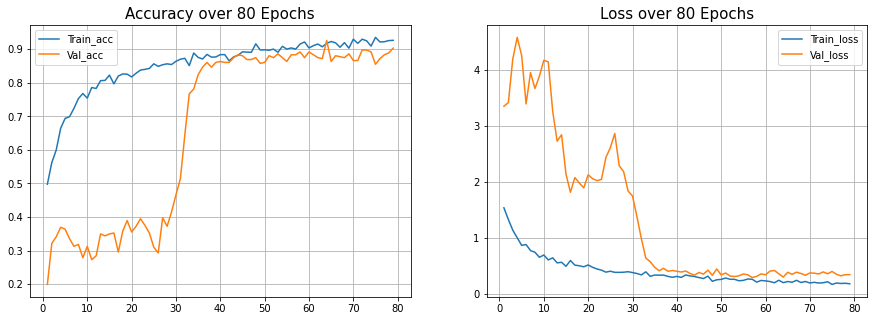

In [ ]:
#Plot the accuracy and loss graphs

import matplotlib.pyplot as plt


def plot_acc_loss(result, epochs):
    acc = result.history['acc']
    loss = result.history['loss']
    val_acc = result.history['val_acc']
    val_loss = result.history['val_loss']
    plt.figure(figsize=(15, 5))
    plt.subplot(121)
    plt.plot(range(1,epochs), acc[1:], label='Train_acc')
    plt.plot(range(1,epochs), val_acc[1:], label='Val_acc')
    plt.title('Accuracy over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.subplot(122)
    plt.plot(range(1,epochs), loss[1:], label='Train_loss')
    plt.plot(range(1,epochs), val_loss[1:], label='Val_loss')
    plt.title('Loss over ' + str(epochs) + ' Epochs', size=15)
    plt.legend()
    plt.grid(True)
    plt.show()
    
plot_acc_loss(result, 80)

In [ ]:
#Save the trained model and copy to drive

model.save('4-class-Covid19-Mod-Xception.h5')
#!cp /content/"4-class-Covid19-Mod-Xception.h5" /content/drive/"My Drive"/"Colab Notebooks"


**Evaluate using evaluate Generator**

In [ ]:
# Create evaluate data generator from test set

test_datagen = ImageDataGenerator(rescale=1. / 255)
test_dir =  '/content/drive/My Drive/DATASET/covid-19/four_classes/test'
eval_generator = test_datagen.flow_from_directory(test_dir,target_size=IMAGE_SIZE,batch_size=1, 
                                                  shuffle=False, seed=42, class_mode="categorical")
eval_generator.reset()    


Found 280 images belonging to 4 classes.


In [ ]:
# Evalute the trained model on evaluate generator
eval_generator.reset()  
x = model.evaluate_generator(eval_generator,
                           steps = np.ceil(len(eval_generator)), 
                           use_multiprocessing = False,
                           verbose = 1,
                           workers=1,
                           )


print('Test loss:' , x[0])
print('Test accuracy:',x[1])

Instructions for updating:
Please use Model.evaluate, which supports generators.
280/280 [==============================] - 11s 38ms/step - loss: 0.3427 - acc: 0.9143
Test loss: 0.3427017629146576
Test accuracy: 0.9142857193946838


**Create DataGen on single folder/class and predict !**

In [ ]:
IMAGE_SIZE    = (128, 128)
test_datagen = ImageDataGenerator(rescale=1. / 255)
test_dir =  '/content/drive/My Drive/DATASET/covid-19/four_classes/test'
pred_generator = test_datagen.flow_from_directory(
        test_dir,target_size=IMAGE_SIZE,
        batch_size=1,
        shuffle=False,
        
        seed=42,
        
        class_mode="categorical")
pred_generator.reset()   

count=[0,0,0,0]

files=pred_generator.filenames

for i in range(len(files)):
  x,y = pred_generator.next()
  img = x
  predict=model.predict(img)
  
  p=np.argmax(predict, axis=-1)
  print(str(p[0])+" "+files[pred_generator.batch_index-1])
  count[p[0]]+=1
  
print(count)
  


Found 280 images belonging to 4 classes.
0 covid/RX-torace-a-letto-del-paziente-in-unica-proiezione-AP-1-1.jpeg
0 covid/S1-new.png
0 covid/SARS-10.1148rg.242035193-g04mr34g0-Fig8a-day0.jpeg
0 covid/SARS-10.1148rg.242035193-g04mr34g0-Fig8b-day5.jpeg
0 covid/SARS-10.1148rg.242035193-g04mr34g0-Fig8c-day10.jpeg
0 covid/SARS-10.1148rg.242035193-g04mr34g04a-Fig4a-day7.jpeg
0 covid/SARS-10.1148rg.242035193-g04mr34g04b-Fig4b-day12.jpeg
0 covid/SARS-10.1148rg.242035193-g04mr34g05x-Fig5-day9.jpeg
0 covid/SARS-10.1148rg.242035193-g04mr34g07a-Fig7a-day5.jpeg
0 covid/SARS-10.1148rg.242035193-g04mr34g07b-Fig7b-day12.jpeg
0 covid/SARS-10.1148rg.242035193-g04mr34g09a-Fig9a-day17.jpeg
0 covid/SARS-10.1148rg.242035193-g04mr34g09b-Fig9b-day19.jpeg
0 covid/SARS-10.1148rg.242035193-g04mr34g09c-Fig9c-day27.jpeg
0 covid/X-ray_of_cyst_in_pneumocystis_pneumonia_1.jpg
0 covid/radiol.2020201160.fig3b.jpeg
0 covid/radiol.2020201160.fig3c.jpeg
0 covid/radiol.2020201160.fig3d.jpeg
0 covid/radiol.2020201160.fig6b.jp

### **`Predict Results using predict generator and evaluate the accuracy and Confusion matrix `**

Instructions for updating:
Please use Model.predict, which supports generators.


findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


[[35  0  0  0]
 [ 0 98  0  2]
 [ 1  3 65  6]
 [ 1  1 10 58]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        35
           1       0.96      0.98      0.97       100
           2       0.87      0.87      0.87        75
           3       0.88      0.83      0.85        70

    accuracy                           0.91       280
   macro avg       0.91      0.92      0.92       280
weighted avg       0.91      0.91      0.91       280



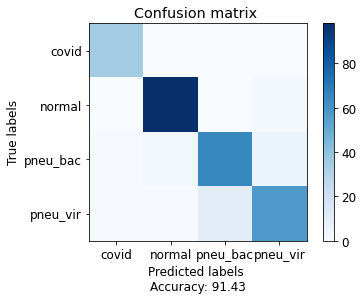

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report



filenames = eval_generator.filenames
nb_samples = len(filenames)
eval_generator.reset()  
predict = model.predict_generator(eval_generator,steps = np.ceil(len(eval_generator)))
pp=predict
predict=np.argmax(predict, axis=-1)
classes= eval_generator.classes[eval_generator.index_array]
acc=sum(predict==classes)/len(predict)
names=["covid","normal","pneu_bac","pneu_vir"]

font = {
'family': 'Times New Roman',
'size': 12
}
plt.rc('font', **font)
cm = confusion_matrix(classes, predict)
print(cm)
print(classification_report(classes,predict))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel('Predicted labels \nAccuracy: {:0.2f}'.format(acc*100))
plt.ylabel("True labels")
plt.xticks([0, 1, 2, 3], names)
plt.yticks([0, 1, 2, 3], names)
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()